In [5]:
# Pipeline (first cell)

from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.filters import QTradableStocksUS



def make_pipeline():
    return Pipeline(columns={
        'volume': USEquityPricing.volume.latest * ((USEquityPricing.close.latest - USEquityPricing.open.latest) / USEquityPricing.close.latest)
        })


my_pipe = make_pipeline()

pipeline_data = run_pipeline(my_pipe, start_date='2014-1-1', end_date='2016-1-1').dropna()

Dropped 5.2% entries from factor data: 5.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-7.347699e+09,1.366834e+01,-59673.646256,8.949812e+06,743051,20.012950
2,-3.199434e+04,6.106188e+02,-917.125020,1.805536e+03,752458,20.266313
3,-6.055634e+03,3.856870e+03,-33.992781,3.975011e+02,739790,19.925120
4,-9.059346e+02,2.013664e+04,729.510414,1.349033e+03,735899,19.820321
5,-2.173586e+01,9.077829e+07,37294.409321,3.272619e+05,741653,19.975297


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.952,-0.074,0.034
beta,1.186,-0.321,-0.232
Mean Period Wise Return Top Quantile (bps),265.720,-60.441,3.172
Mean Period Wise Return Bottom Quantile (bps),-181.411,-61.560,-13.839
Mean Period Wise Spread (bps),447.131,0.612,-1.089


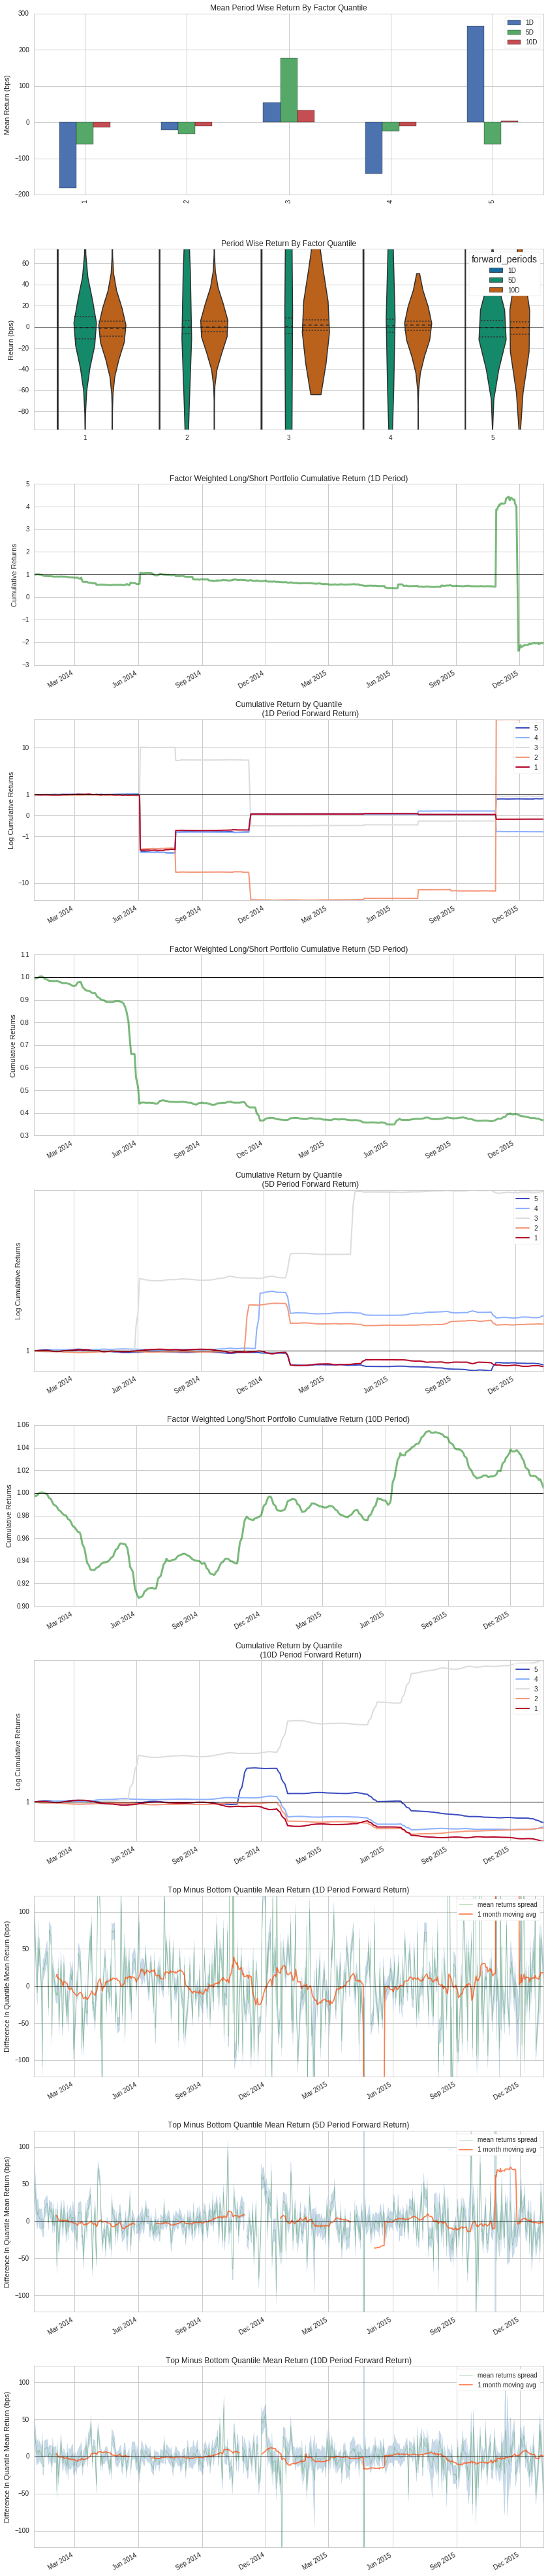

Information Analysis


,1D,5D,10D
IC Mean,0.002,-0.006,-0.001
IC Std.,0.105,0.102,0.097
Risk-Adjusted IC,0.016,-0.061,-0.006
t-stat(IC),0.365,-1.374,-0.139
p-value(IC),0.716,0.170,0.889
IC Skew,0.220,-0.124,-0.216
IC Kurtosis,0.590,0.609,0.570


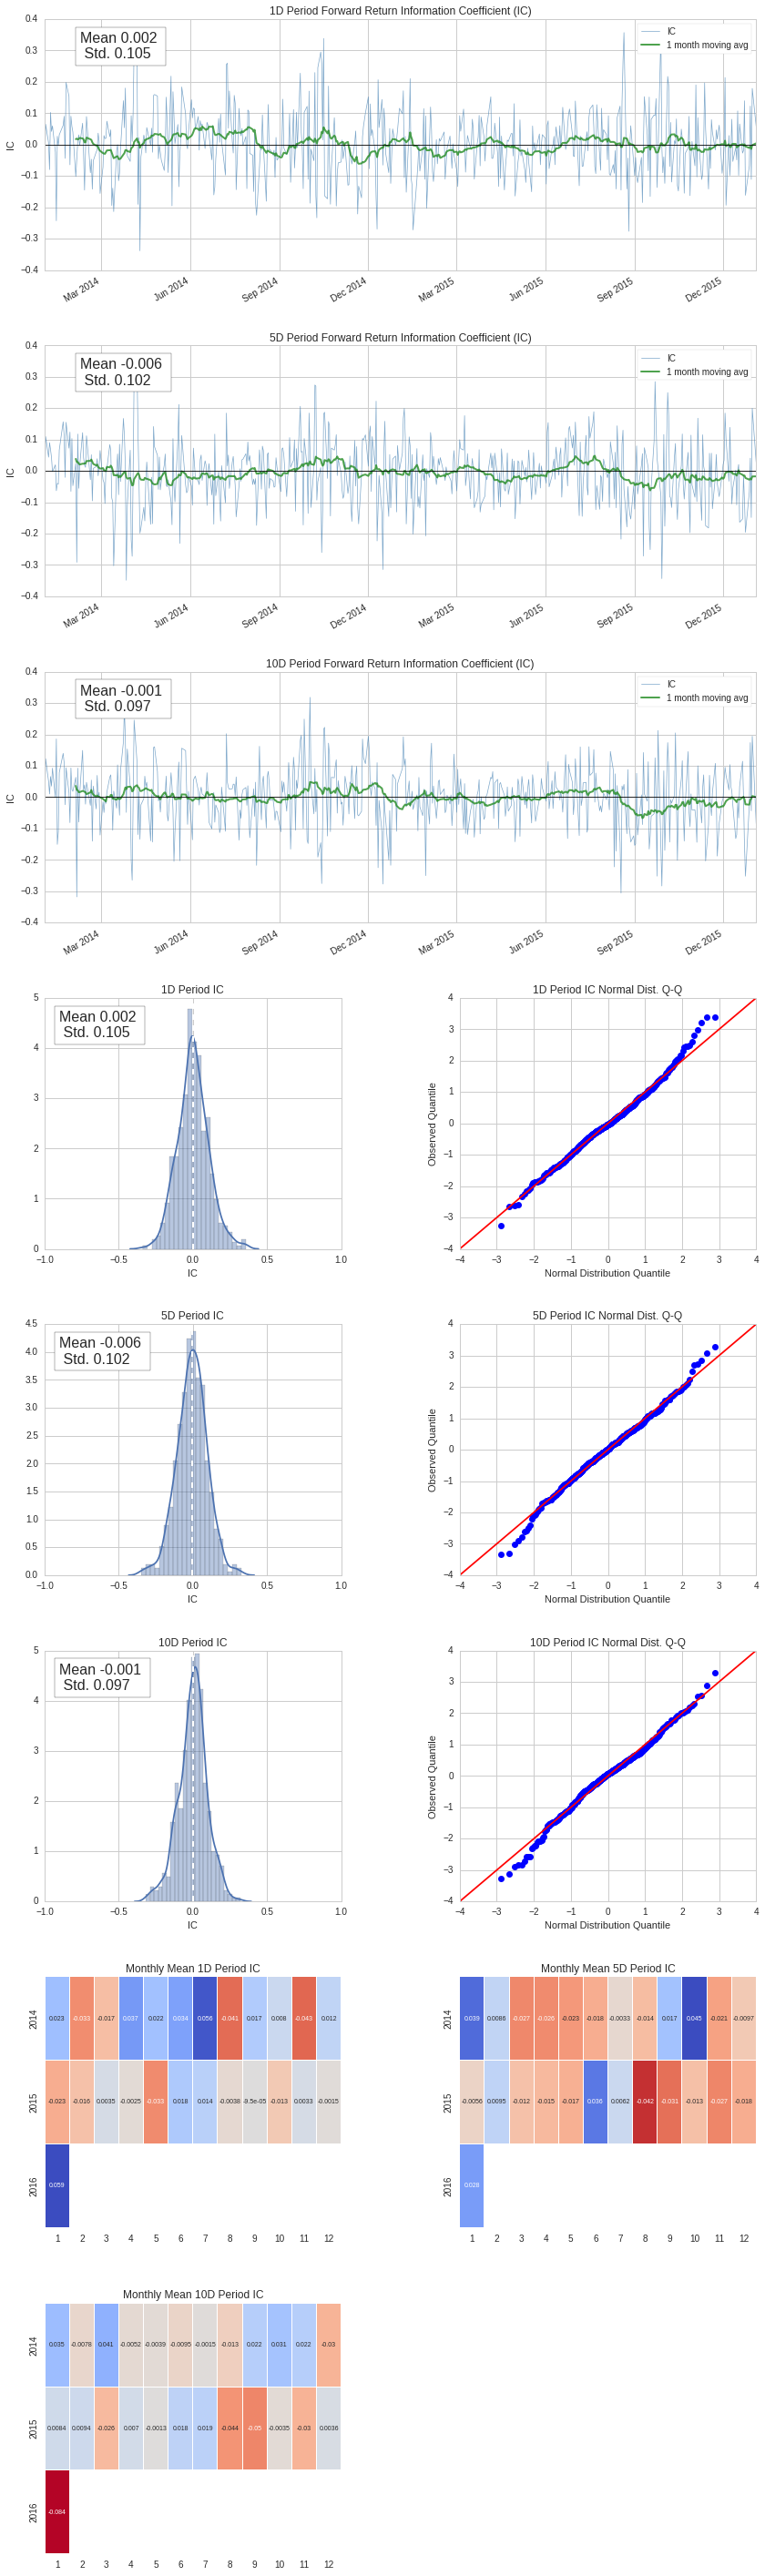

Turnover Analysis


,10D,1D,5D
Quantile 1 Mean Turnover,0.646,0.637,0.647
Quantile 2 Mean Turnover,0.759,0.752,0.764
Quantile 3 Mean Turnover,0.658,0.641,0.644
Quantile 4 Mean Turnover,0.762,0.753,0.763
Quantile 5 Mean Turnover,0.667,0.657,0.671


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.013,0.002,0.018


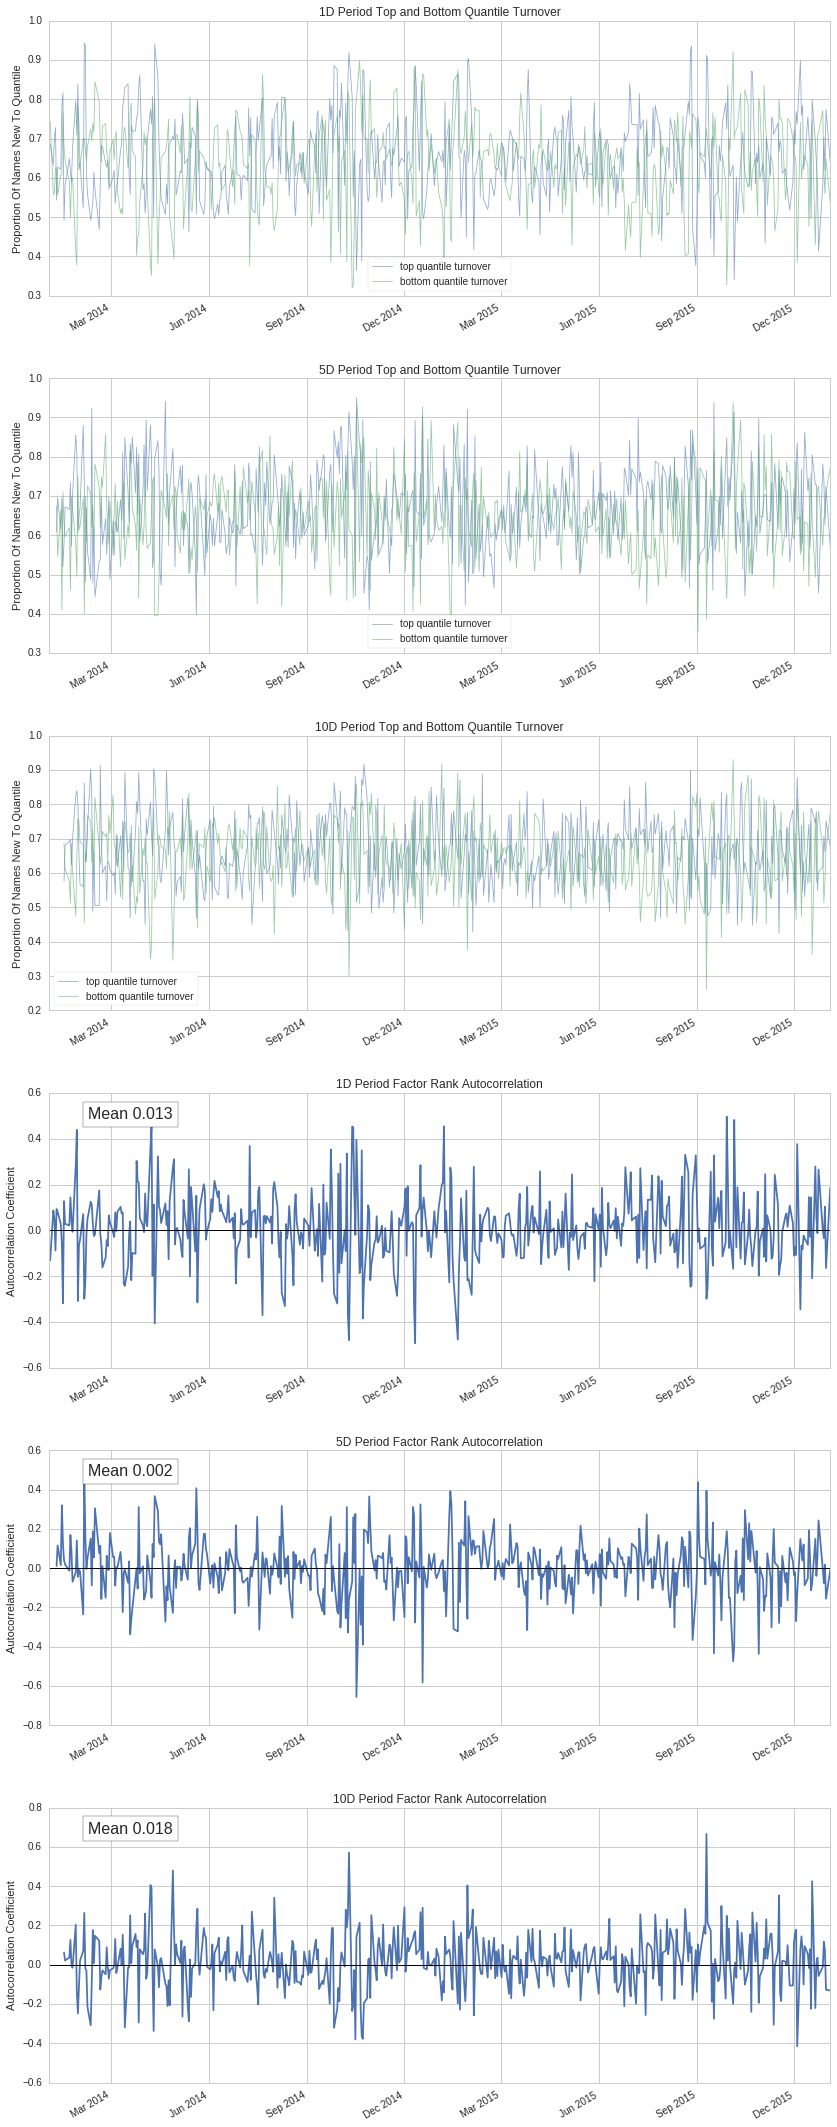

In [6]:
# Alphalens (second cell)

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet


pricing_data = get_pricing(
  symbols=pipeline_data.index.levels[1], # Finds all assets that appear at least once in the pipeline
  start_date='2014-1-1',
  end_date='2016-2-1', #1 trading day after end date of pipeline
  fields='open_price'
)

merged_data = get_clean_factor_and_forward_returns(
  factor=pipeline_data['volume'],
  prices=pricing_data
)

create_full_tear_sheet(merged_data)